In [2]:
import pandas as pd
import seaborn as sb
import numpy as np

In [5]:
def comment_motion_detector(comment:str):
    keywords = ["motion", "moion", "motio", "ringing", 'rinin', 'ringin']
    tocmp = comment.lower()
    return any(map(lambda x: x in tocmp, keywords))

In [4]:
comment_motion_detector("rIngin")

NameError: name 'comment_motion_detector' is not defined

In [6]:
ampscz_scores = pd.read_csv("AMPSCZ_scores.csv")[
    ["sub_id_gs", "ses_id_gs", "timepoint_gs", "score", "comment"]
]
ampscz_scores["score"] = (
    ampscz_scores["score"].replace("-", "-1").fillna("-1").astype(int)
)
ampscz_scores["comment"] = ampscz_scores["comment"].fillna("")
ampscz_scores["motion_free"] = ~(
    ampscz_scores["comment"].apply(comment_motion_detector)
    | (ampscz_scores["score"] <= 2)
)


ampscz_scores.head()

,sub_id_gs,ses_id_gs,timepoint_gs,score,comment,motion_free
0,BI02450,202306231,month_2_arm_1,2,"severe ringing, ghosting at eyes, motion",False
1,BI02450,202304111,baseline_arm_1,3,ringing throughout,False
2,BI04369,202312081,NaN,-1,,False
3,BI05529,202306051,baseline_arm_2,4,no notable issues,True
4,BI05529,202312011,NaN,-1,,False


In [99]:
len(ampscz_scores)

1129

In [84]:
ampscz_scores['score'].unique()

array([ 2,  3, -1,  4,  1,  5])

c:\Users\Brico\miniconda3\envs\bowl\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Brico\miniconda3\envs\bowl\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='score', ylabel='Count'>

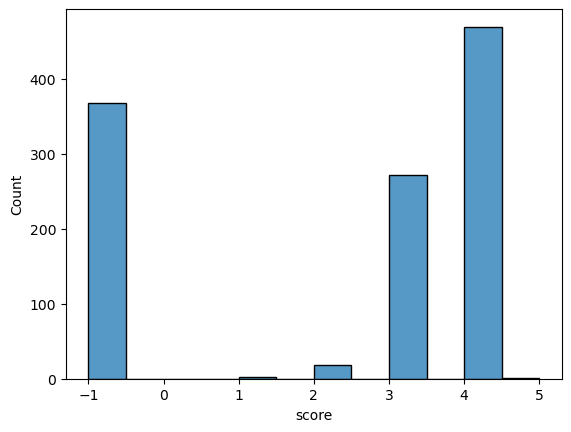

In [85]:
sb.histplot(ampscz_scores, x="score")

c:\Users\Brico\miniconda3\envs\bowl\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Brico\miniconda3\envs\bowl\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Brico\miniconda3\envs\bowl\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Brico\miniconda3\envs\bowl\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

<Axes: xlabel='score', ylabel='Count'>

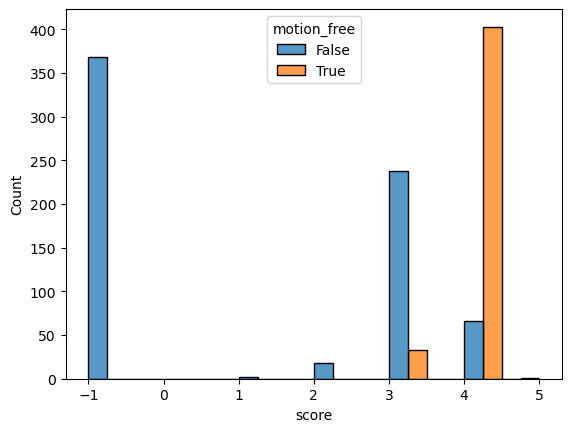

In [86]:
sb.histplot(ampscz_scores, x="score", hue="motion_free", multiple="dodge")

In [87]:
motion_free_ampscz = ampscz_scores[ampscz_scores['motion_free']]
len(motion_free_ampscz)

437

In [88]:
motion_free_ampscz[motion_free_ampscz['score']==3]

,sub_id_gs,ses_id_gs,timepoint_gs,score,comment,motion_free
45,CA01089,202303311,month_2_arm_1,3,ghosting at eyes that clips brain a bit,True
60,CA09370,202305261,month_2_arm_1,3,a bit of cerebral atrophy,True
118,CP47813,202307131,baseline_arm_1,3,grainy,True
135,GA00423,202302211,baseline_arm_2,3,A bit blurrier than normal,True
140,GA00940,202307121,month_2_arm_1,3,a bit grainy,True
148,GA06611,202304201,baseline_arm_1,3,mild ghosting of eyes with very mild impact on...,True
156,GA11836,202307311,month_2_arm_1,3,moderately grainy,True
234,IR09281,202306211,month_2_arm_1,3,ghosting of eyes clips brain a bit,True
267,KC02324,202306211,month_2_arm_1,3,grainy,True
271,KC04005,202306221,baseline_arm_1,3,Some bluriness,True


In [89]:
motion_free_ampscz[motion_free_ampscz['comment']=="lots of artifacts outside of the skull, odd but doesn't affect brain"]

,sub_id_gs,ses_id_gs,timepoint_gs,score,comment,motion_free
1063,WU09114,202306161,month_2_arm_1,4,"lots of artifacts outside of the skull, odd bu...",True


In [96]:
hcpep_scores = pd.read_csv("HCPEP_scores.csv")
hcpep_scores["T1w"] = (
    hcpep_scores["T1w"]
    .fillna("-1")
    .replace("2?", "-1")
    .replace("3/4", "3.5")
    .replace("3 / 4", "3.5")
    .replace("2/3", "2.5")
    .replace("3/2", "2.5")
    .replace("4/3", "3.5")
    .replace("2/ 3", "3.5")
    .astype(float)

)
hcpep_scores["T1w comment"] = hcpep_scores["T1w comment"].fillna("")
hcpep_scores["motion_free"] = ~(
    hcpep_scores["T1w comment"].apply(comment_motion_detector)
    | (hcpep_scores["T1w"] <= 2)
)

hcpep_scores.head()

,Date,Subject ID,T1w,T1w comment,T2w,T2w comment,Center,motion_free
0,14/8/2018,2031_MR1,-1.0,moving from BWH,NaN,NaN,McLean,False
1,14/11/2019,4002_MR2,4.0,,3,noise,McLean,True
2,18/12/2019,4012_MR1,3.5,couldnt tell if the motion was a computer arti...,3,faint ringing,McLean,False
3,25/7/2018,4015_MR1,3.5,mild ringing,3/4,mild ringing,McLean,False
4,19/11/2018,4017_MR1,4.0,,2/3,ringing motion,McLean,True


c:\Users\Brico\miniconda3\envs\bowl\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Brico\miniconda3\envs\bowl\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='T1w', ylabel='Count'>

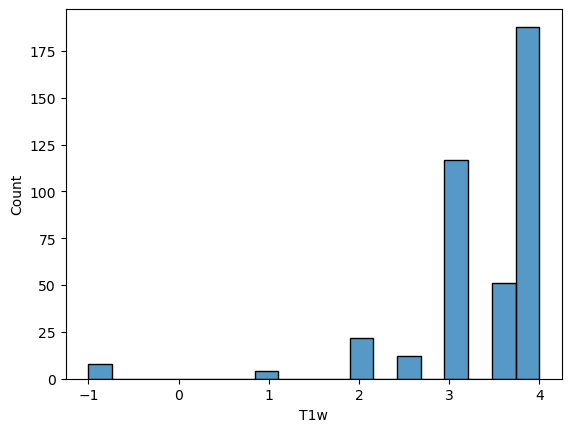

In [95]:
sb.histplot(hcpep_scores, x="T1w")

In [1]:
sb.histplot(hcpep_scores, x="T1w", hue="motion_free", multiple="dodge")

NameError: name 'sb' is not defined

In [98]:
motion_free_hcpep = hcpep_scores[ampscz_scores['motion_free']]
len(motion_free_hcpep)

C:\Users\Brico\AppData\Local\Temp\ipykernel_9784\286847717.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  motion_free_hcpep = hcpep_scores[ampscz_scores['motion_free']]


140